In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib
import random as rand
from matplotlib import pyplot as plt
from itertools import product
import itertools
import time
import re
import csv
from hurst import compute_Hc
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
import tqdm

%matplotlib inline

In [2]:
plt.rcParams["axes.labelsize"] = 16. 
plt.rcParams["xtick.labelsize"] = 14. 
plt.rcParams["ytick.labelsize"] = 14. 
plt.rcParams["legend.fontsize"] = 12. 
plt.rcParams["figure.figsize"] = [17., 8.]

## Import CSV data  
Текущие параметры полностью скопированы из статьи

In [3]:
data = pd.read_csv('data/new_data.csv')

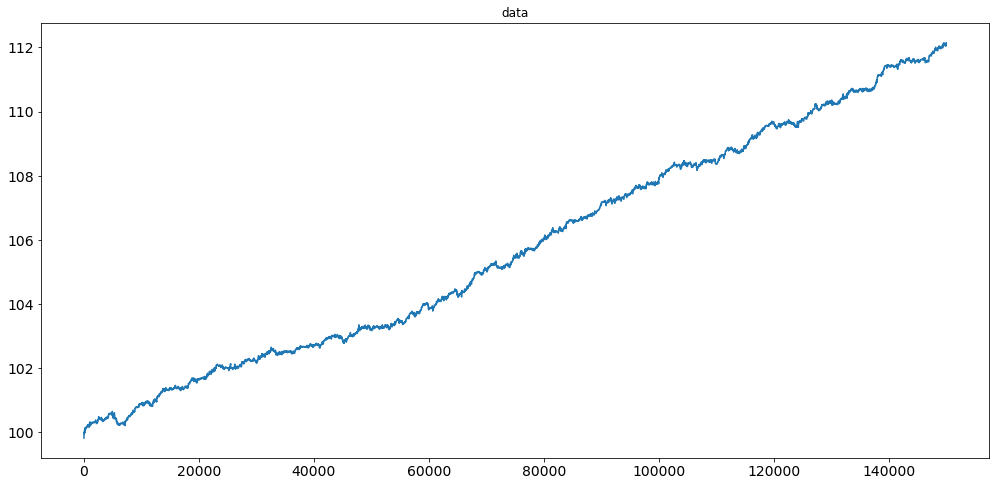

In [4]:
plt.plot(data['price'])
plt.title('data')
plt.show()

... и результат какй то странный в итоге...  
А параметры на самом то деле следующие: 

In [6]:
data = pd.read_csv('data/new_data_params.csv')
data.head()

,param_type,param_value
0,ticks_per_day,15000.00
1,num_of_days,10.00
2,tick_size,0.01
3,delta_mm,0.10
4,delta_lc,0.10


Лучще сверять их со с таблицей параметров в статье. Там есть описание что есть что

In [7]:
data1 = pd.read_csv('data/new_data_with_old_params.csv')

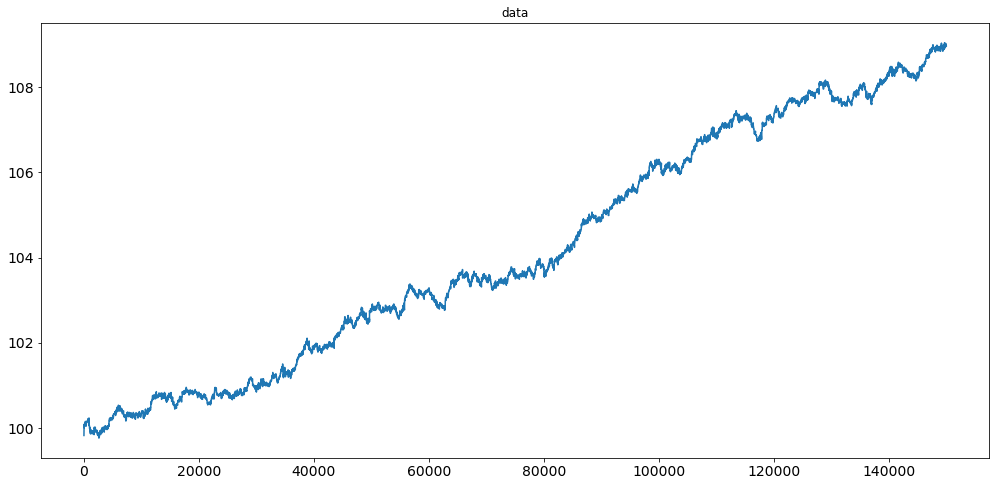

In [8]:
plt.plot(data1['price'])
plt.title('data')
plt.show()

In [9]:
data_33 = pd.read_csv('data/new_data_33.csv')

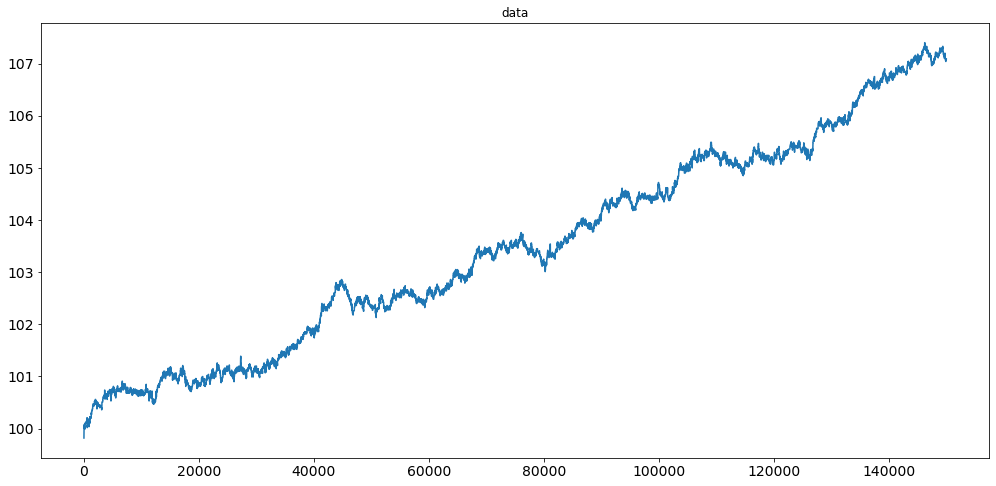

In [10]:
plt.plot(data_33['price'])
plt.title('data')
plt.show()

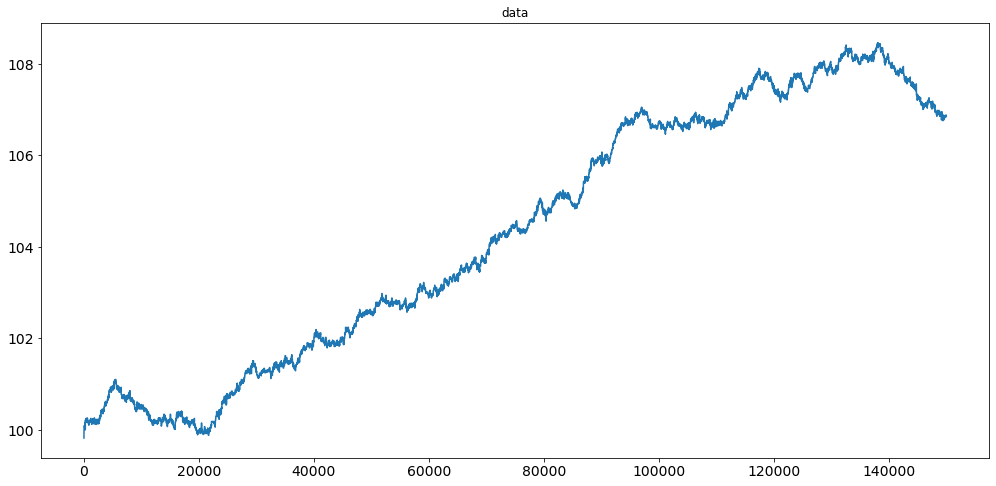

In [11]:
data_32 = pd.read_csv('data/new_data_32.csv')
plt.plot(data_32['price'])
plt.title('data')
plt.show()

In [12]:
data_p = pd.read_csv('data/new_data_32_params.csv')
data_p.head(8)

,param_type,param_value
0,ticks_per_day,15000.00
1,num_of_days,10.00
2,tick_size,0.01
3,delta_mm,0.10
4,delta_lc,0.10
5,delta_mr,0.40
6,delta_mt,0.40
7,delta_nt,0.75


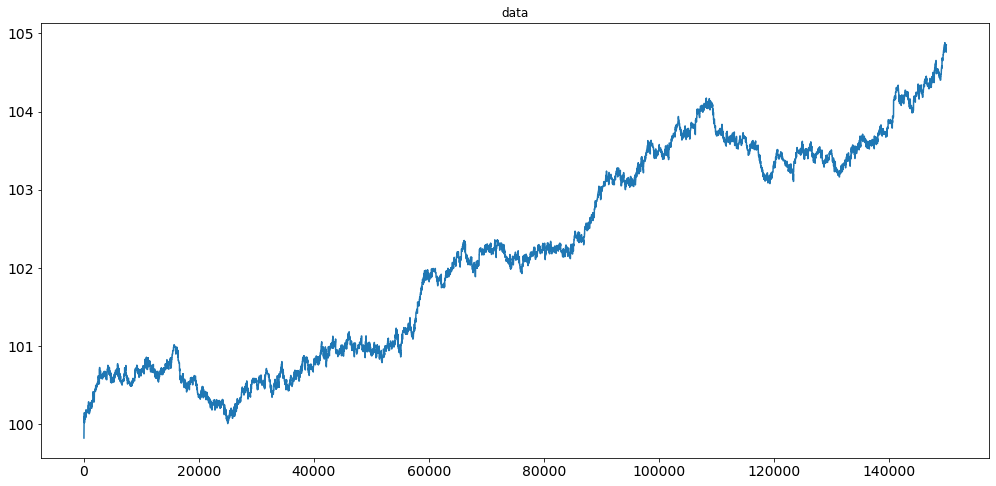

In [13]:
data_par = pd.read_csv('data/new_data_with_my_params_1.csv')
plt.plot(data_par['price'])
plt.title('data')
plt.show()

In [14]:
data_p1 = pd.read_csv('data/new_data_with_my_params_params.csv')
data_p1.head(5)

,param_type,param_value
0,ticks_per_day,15000.00
1,num_of_days,20.00
2,tick_size,0.01
3,delta_mm,0.10
4,delta_lc,0.10


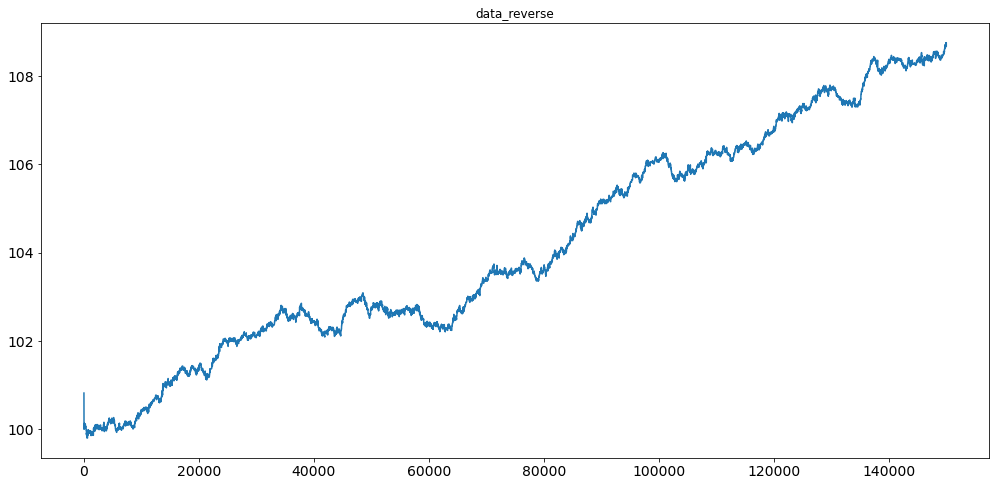

In [15]:
# А вот тут должно быть обратное направление...
data_reverse = pd.read_csv('data/reverse_trend.csv')
plt.plot(data_reverse['price'])
plt.title('data_reverse')
plt.show()

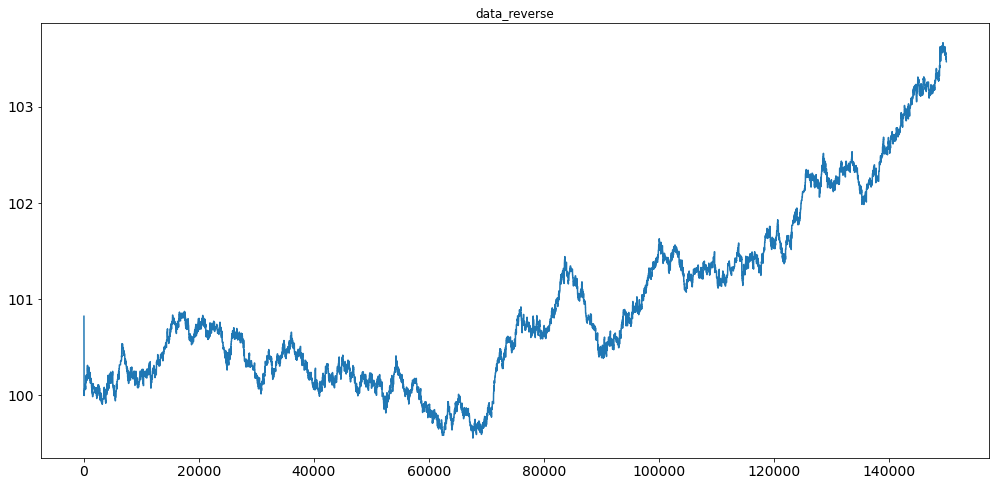

In [16]:
# И тут должно быть обратное направление...
data_reverse = pd.read_csv('data/reverse.csv')
plt.plot(data_reverse['price'])
plt.title('data_reverse')
plt.show()

In [9]:
data_p33 = pd.read_csv('data/reverse_trend.csv')
data_p33.head(4)

,Id,price,volume
0,0,100.82,0.0
1,1,100.34,0.0
2,2,100.00,0.0
3,3,100.00,0.0


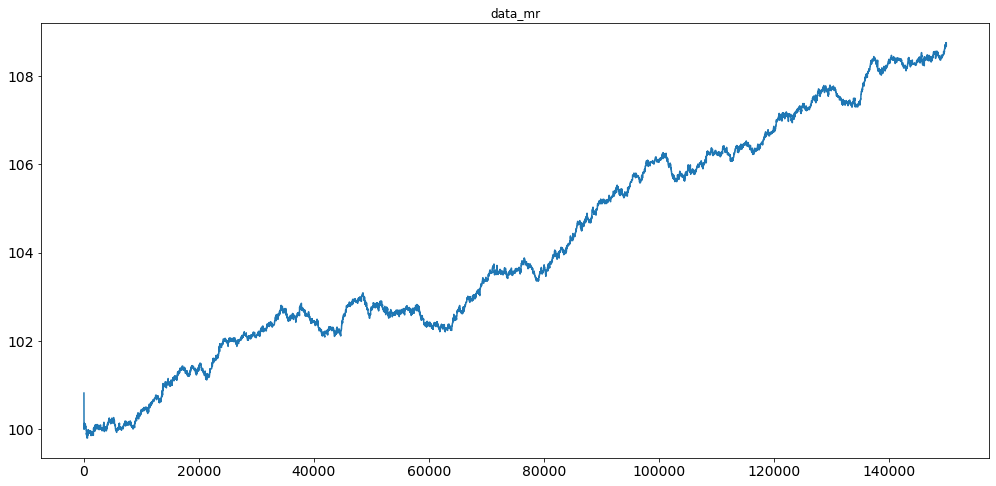

In [16]:
# Здесь увеличен объём сделок для MR traiders
data_mr = pd.read_csv('data/mr_trend.csv')
plt.plot(data_reverse['price'])
plt.title('data_mr')
plt.show()

In [17]:
data_p33 = pd.read_csv('data/mr_trend.csv')
data_p33.head(4)

,Id,price,volume
0,0,99.82,0.0
1,1,99.89,0.0
2,2,100.00,0.0
3,3,100.00,0.0


In [20]:
#data['returns'] = data["price"].pct_change()
data1['returns'] = data1["price"].pct_change()
data_33['returns'] = data_33["price"].pct_change()
data_32['returns'] = data_32["price"].pct_change()

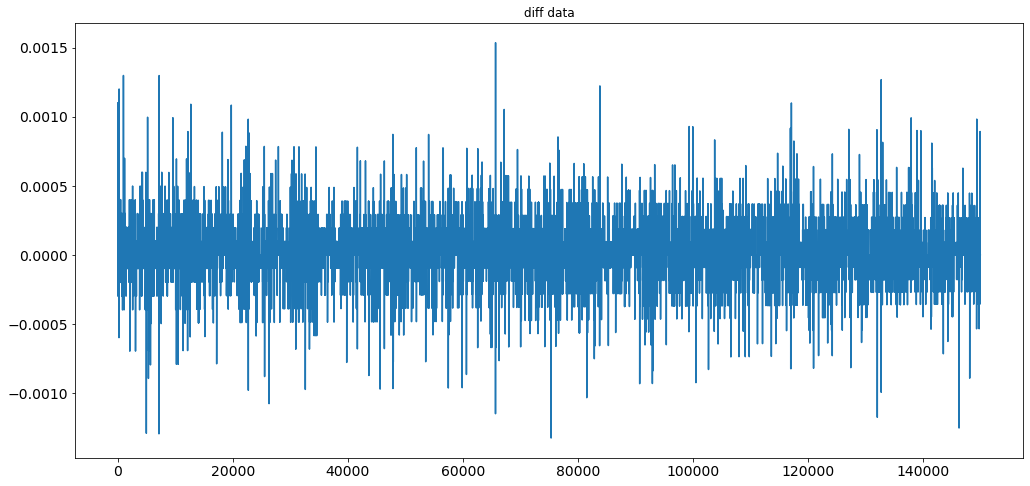

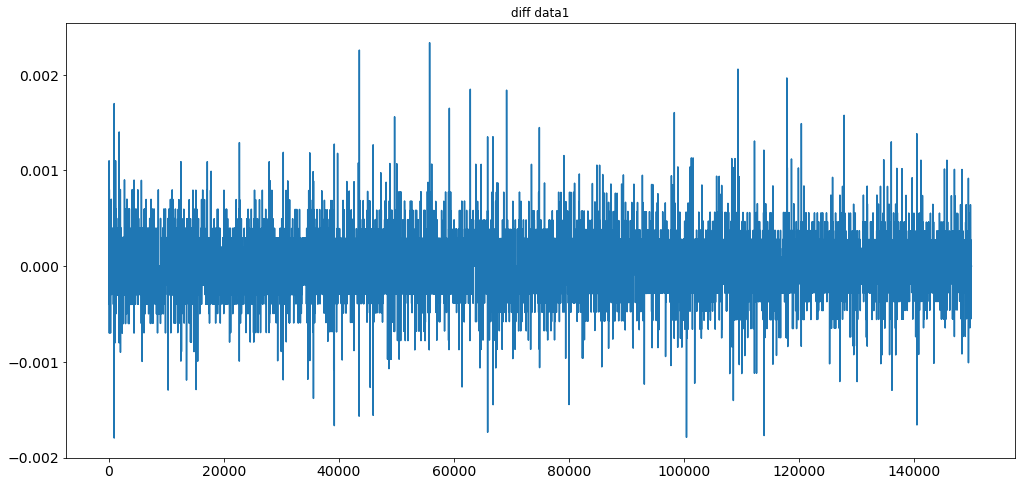

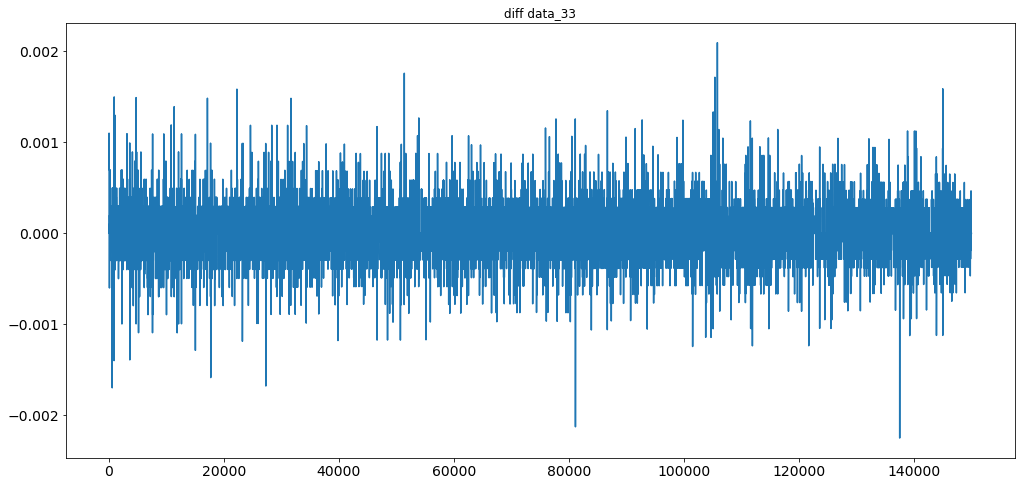

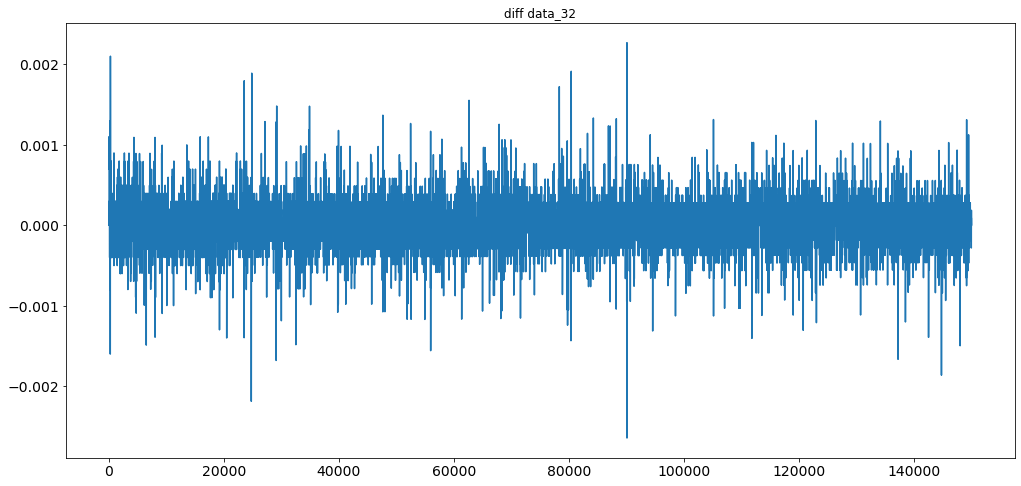

In [30]:
# returns_plot
plt.plot(data['returns'])
plt.title('diff data')
plt.show()

plt.plot(data1['returns'])
plt.title('diff data1')
plt.show()

plt.plot(data_33['returns'])
plt.title('diff data_33')
plt.show()

plt.plot(data_32['returns'])
plt.title('diff data_32')
plt.show()

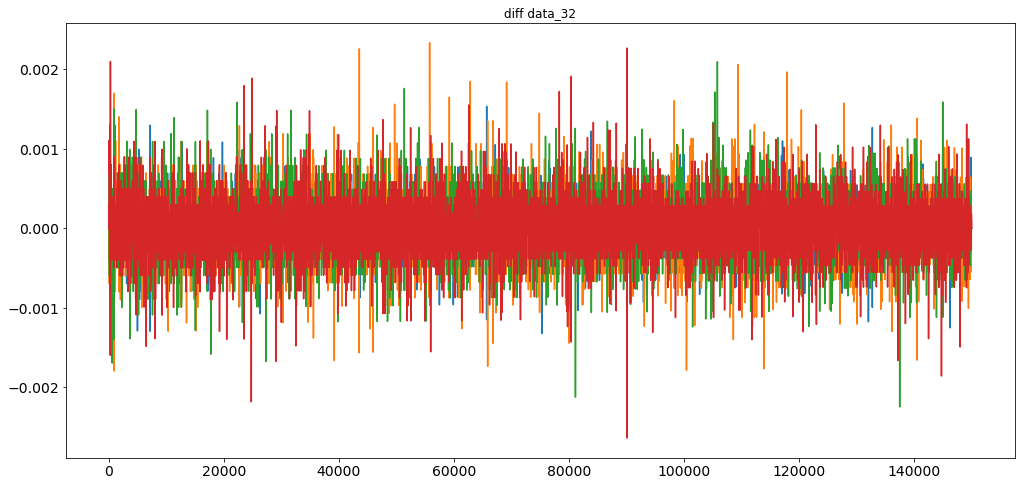

In [32]:
# Самый неинформативный рисунок:)
plt.plot(data['returns'])
plt.title('diff data')


plt.plot(data1['returns'])
plt.title('diff data1')


plt.plot(data_33['returns'])
plt.title('diff data_33')


plt.plot(data_32['returns'])
plt.title('diff data_32')
plt.show()

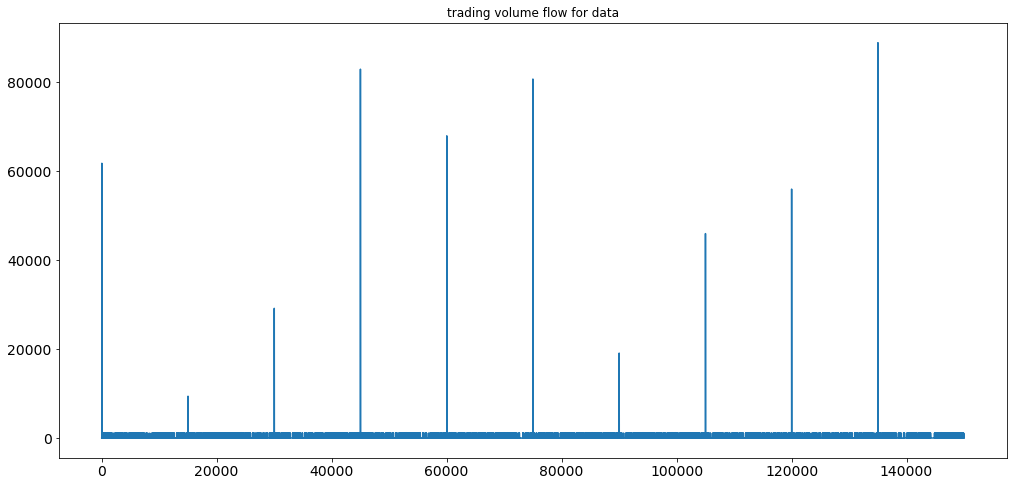

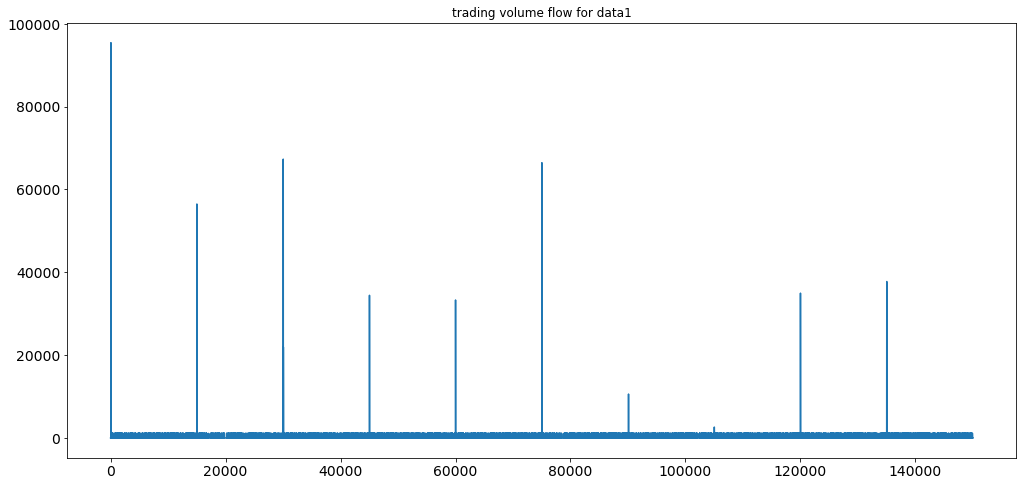

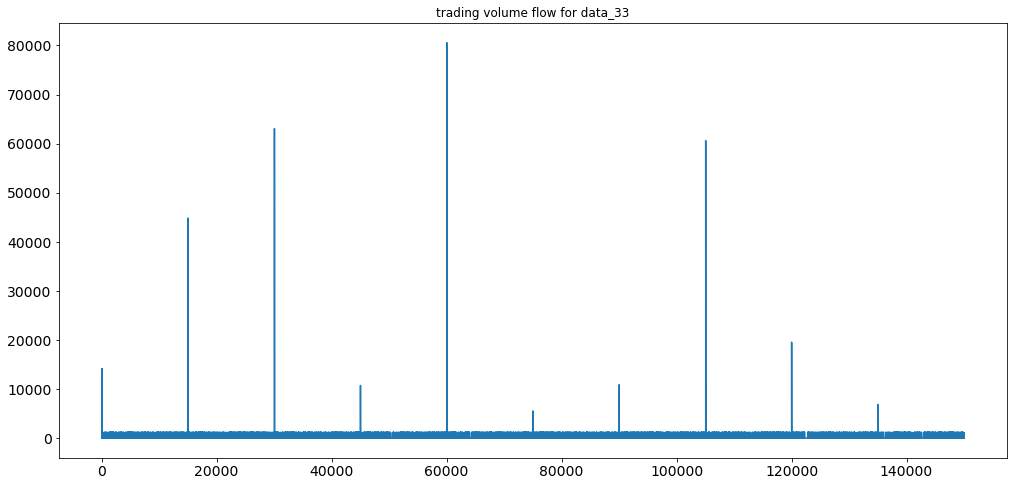

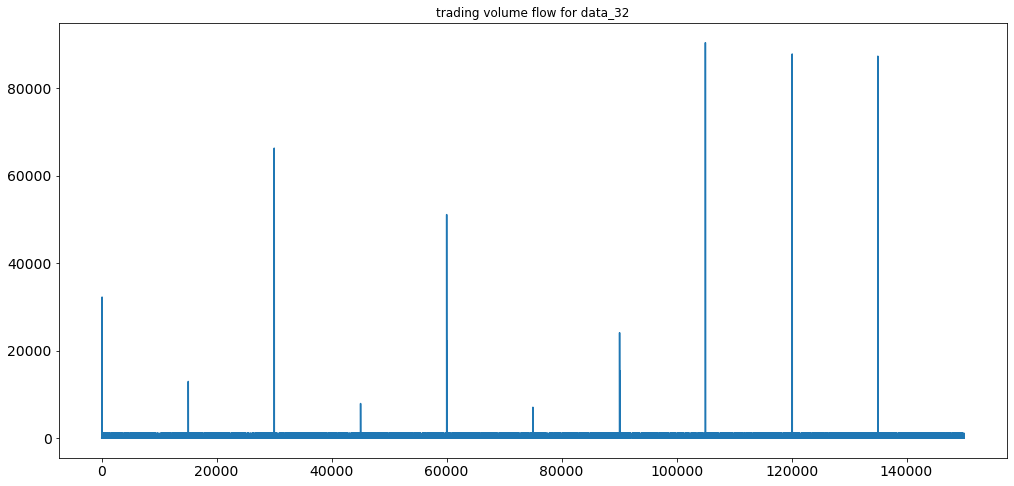

In [35]:
plt.plot(data['volume'])
plt.title('trading volume flow for data')
plt.show()

plt.plot(data1['volume'])
plt.title('trading volume flow for data1')
plt.show()

plt.plot(data_33['volume'])
plt.title('trading volume flow for data_33')
plt.show()

plt.plot(data_32['volume'])
plt.title('trading volume flow for data_32')
plt.show()

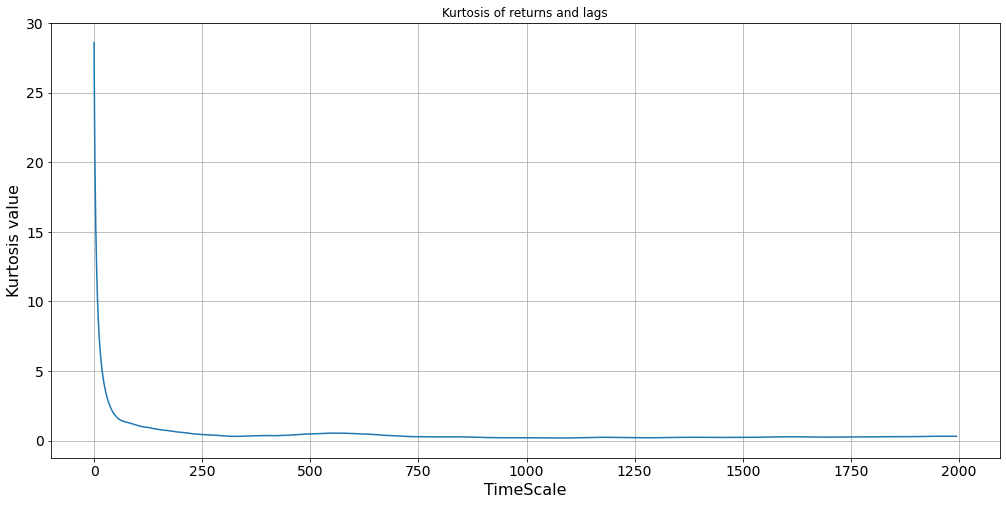

In [48]:
time = []
kurt = []

#kurt_list = [pd.DataFrame(np.diff(data['price'], k)).kurt() for k in range(3000)]
kurt_list_1 = [data["price"].pct_change(k).kurt() for k in range(2000)]

plt.plot(kurt_list_1[5:])
plt.title('Kurtosis of returns and lags')
plt.xlabel('TimeScale')
plt.ylabel('Kurtosis value')
plt.grid(True)
plt.show()

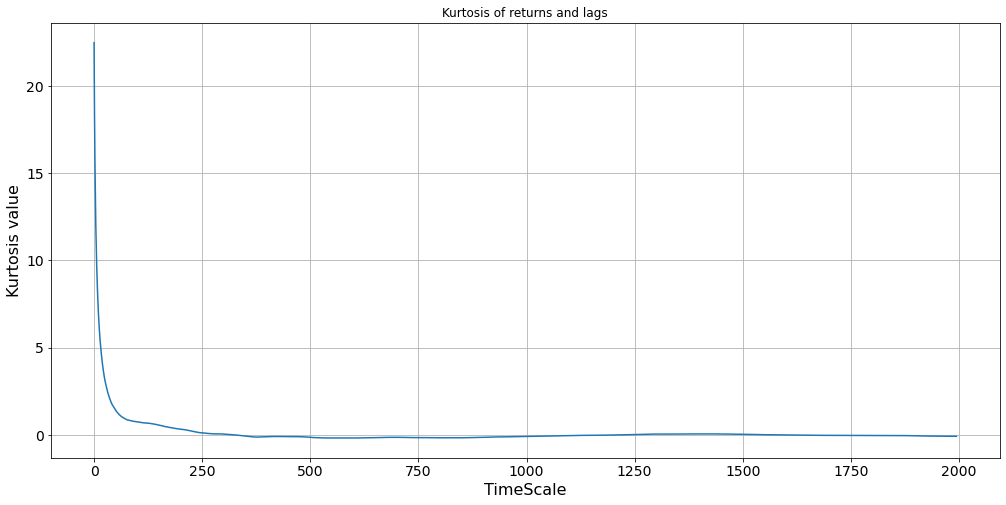

In [49]:
time1 = []
kurt1 = []

#kurt_list = [pd.DataFrame(np.diff(data['price'], k)).kurt() for k in range(3000)]
kurt_list_11 = [data1["price"].pct_change(k).kurt() for k in range(2000)]

plt.plot(kurt_list_11[5:])
plt.title('Kurtosis of returns and lags')
plt.xlabel('TimeScale')
plt.ylabel('Kurtosis value')
plt.grid(True)
plt.show()

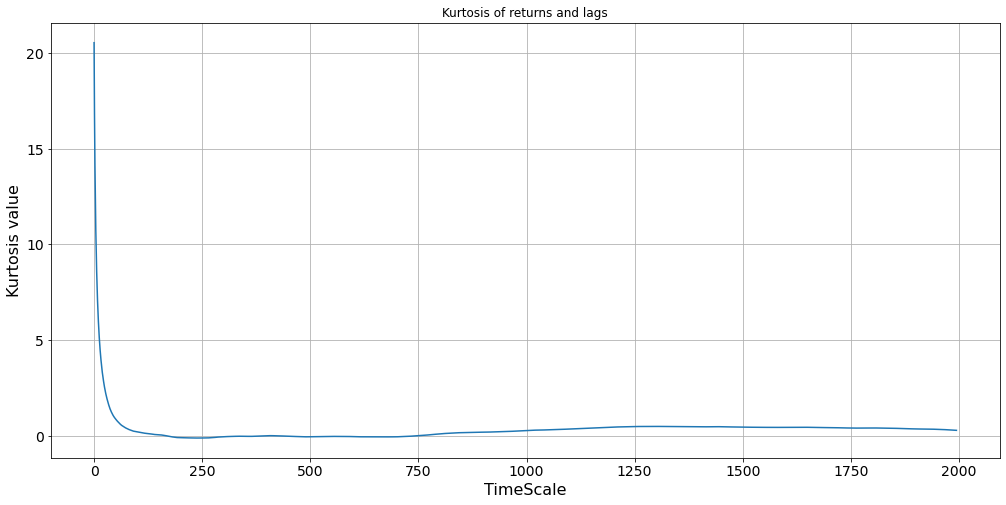

In [50]:
time_33 = []
kurt_33 = []

#kurt_list = [pd.DataFrame(np.diff(data['price'], k)).kurt() for k in range(3000)]
kurt_list_33 = [data_33["price"].pct_change(k).kurt() for k in range(2000)]

plt.plot(kurt_list_33[5:])
plt.title('Kurtosis of returns and lags')
plt.xlabel('TimeScale')
plt.ylabel('Kurtosis value')
plt.grid(True)
plt.show()

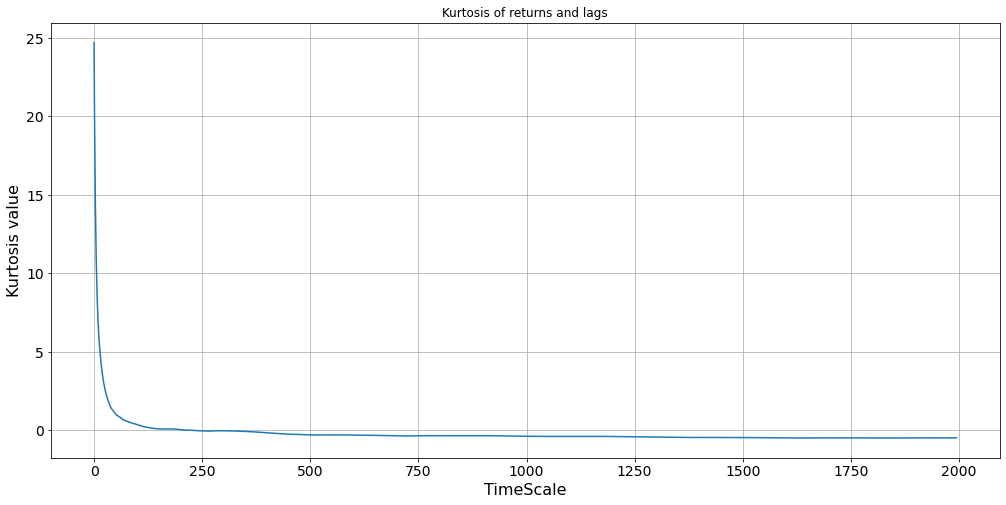

In [51]:
time_32 = []
kurt_32 = []

#kurt_list = [pd.DataFrame(np.diff(data['price'], k)).kurt() for k in range(3000)]
kurt_list_32 = [data_32["price"].pct_change(k).kurt() for k in range(2000)]

plt.plot(kurt_list_32[5:])
plt.title('Kurtosis of returns and lags')
plt.xlabel('TimeScale')
plt.ylabel('Kurtosis value')
plt.grid(True)
plt.show()

## Volatility clustering

In [43]:
H_list = []

for lag in range(1, 1000):
    H, c, Hurst_data = compute_Hc(data["price"].pct_change(lag).dropna().abs(), kind='change', simplified=True)
    H_list.append(H)

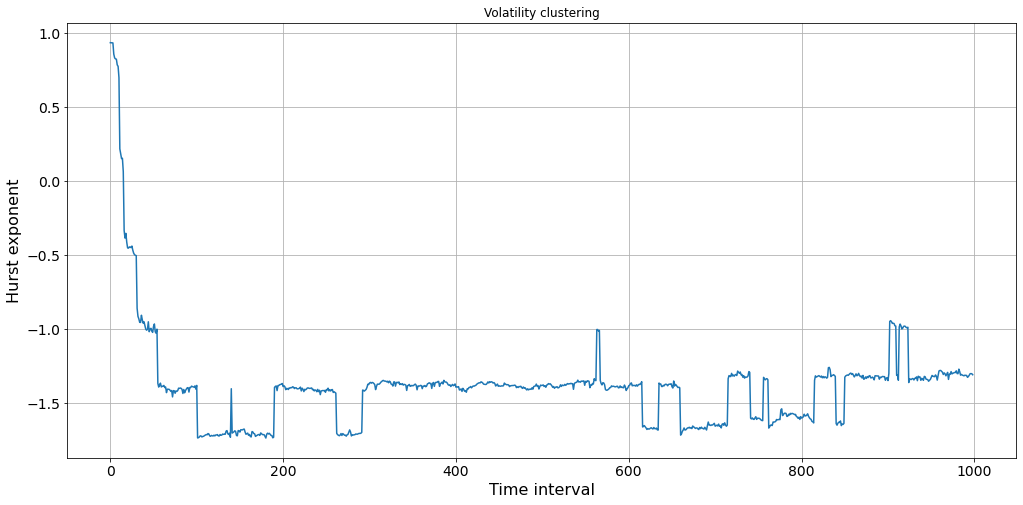

In [44]:
plt.plot(H_list)
plt.xlabel('Time interval')
plt.ylabel('Hurst exponent')
plt.title('Volatility clustering')
plt.grid(True)
plt.show()

-----

In [52]:
H_list1 = []

for lag in range(1, 1000):
    H1, c1, Hurst_data1 = compute_Hc(data1["price"].pct_change(lag).dropna().abs(), kind='change', simplified=True)
    H_list1.append(H1)

------
## Добавили новых параметров

In [18]:
data = pd.read_csv('data/data_with_profit.csv')

In [19]:
data.head(7)

,Id,price,volume,bid_price,ask_price,bid_volume,ask_volume,MM1,LC1,MT1,MRT1,NT1
0,0,100.82,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0
1,1,100.78,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0
2,2,100.74,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0
3,3,100.69,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0
4,4,100.65,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0
5,5,100.60,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0
6,6,100.54,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0


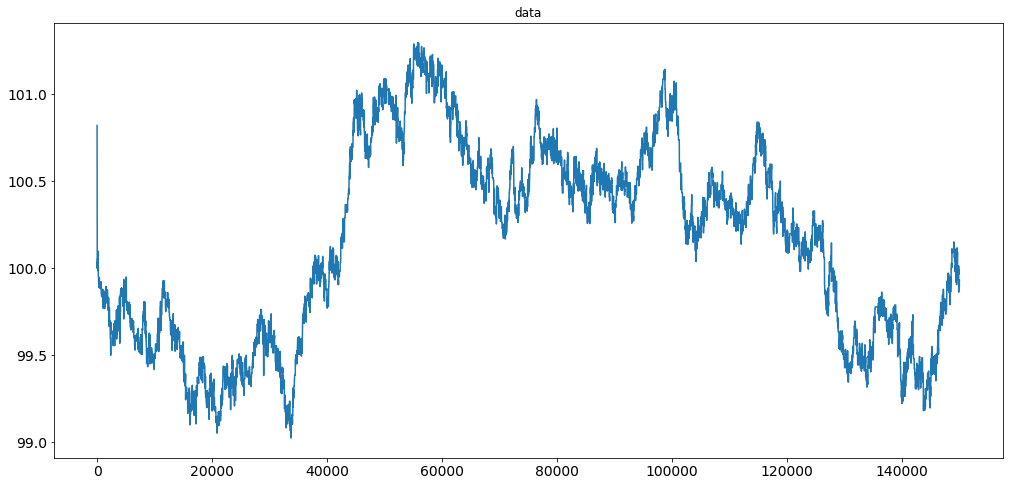

In [20]:
plt.plot(data['price'])
plt.title('data')
plt.show()

In [21]:
for k in range(len(data.MM1.values)):
    if k == 0:
        arr_MM = [data.MM1.values[0]]
    else:
        arr_MM.append(data.MM1.values[k] + arr_MM[-1])
        
for k in range(len(data.LC1.values)):
    if k == 0:
        arr_LC = [data.LC1.values[0]]
    else:
        arr_LC.append(data.LC1.values[k] + arr_LC[-1])
        
for k in range(len(data.MT1.values)):
    if k == 0:
        arr_MT = [data.MT1.values[0]]
    else:
        arr_MT.append(data.MT1.values[k] + arr_MT[-1])
        
for k in range(len(data.MRT1.values)):
    if k == 0:
        arr_MRT = [data.MRT1.values[0]]
    else:
        arr_MRT.append(data.MRT1.values[k] + arr_MRT[-1])
        
for k in range(len(data.NT1.values)):
    if k == 0:
        arr_NT = [data.NT1.values[0]]
    else:
        arr_NT.append(data.NT1.values[k] + arr_NT[-1])

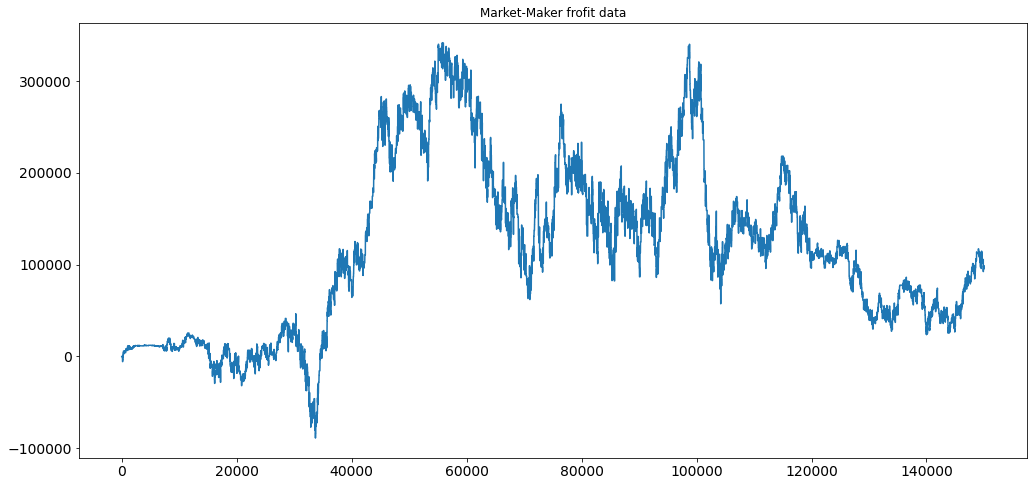

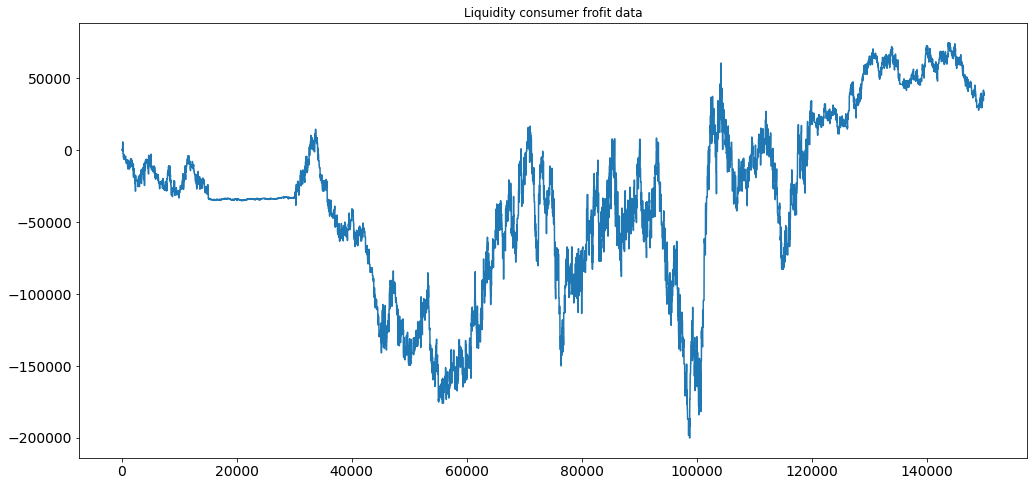

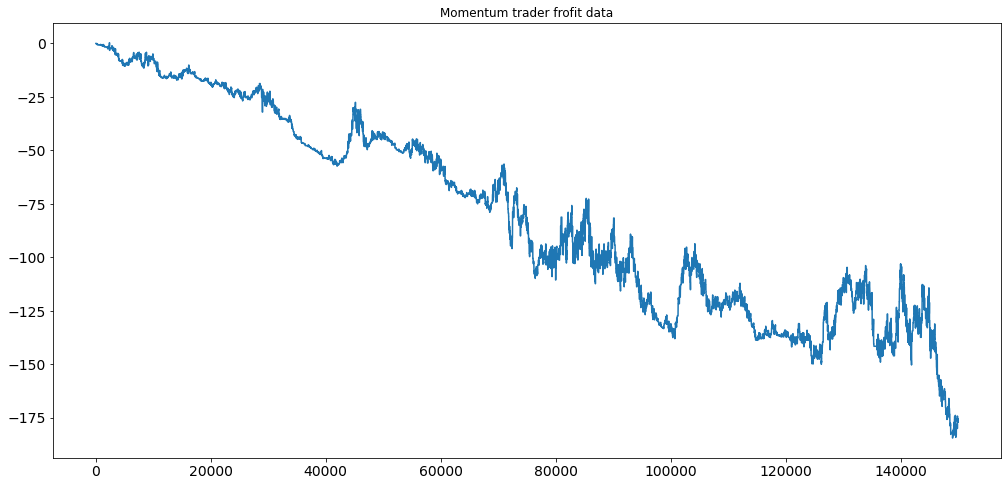

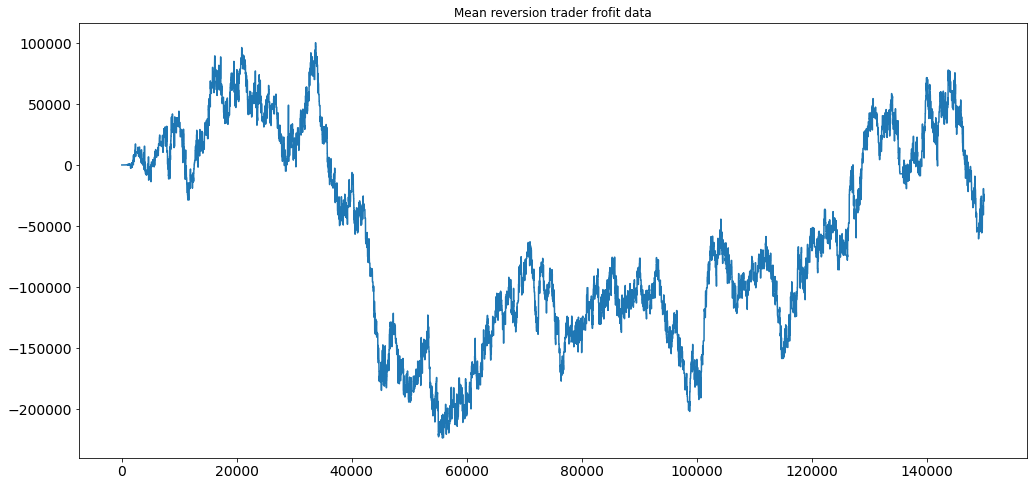

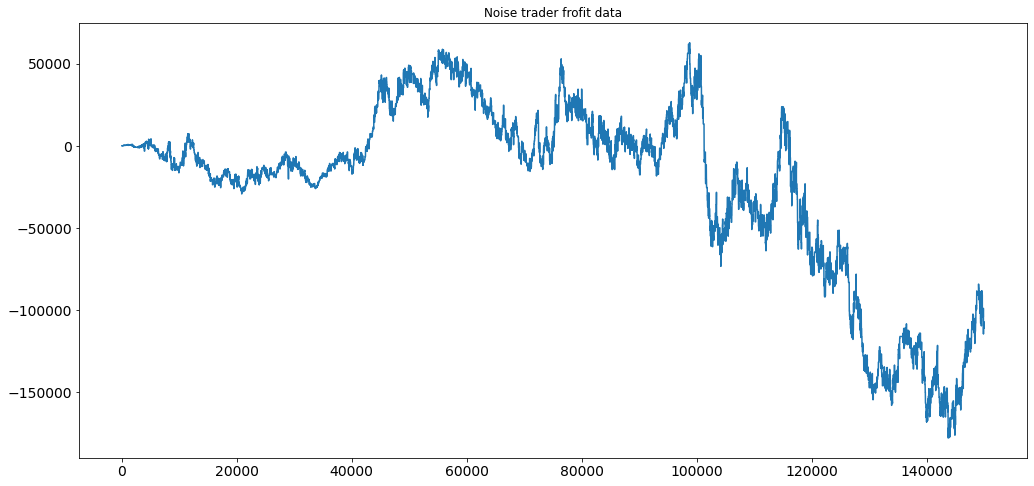

In [22]:
plt.plot(arr_MM)
plt.title('Market-Maker frofit data')
plt.show()

plt.plot(arr_LC)
plt.title('Liquidity consumer frofit data')
plt.show()

plt.plot(arr_MT)
plt.title('Momentum trader frofit data')
plt.show()

plt.plot(arr_MRT)
plt.title('Mean reversion trader frofit data')
plt.show()

plt.plot(arr_NT)
plt.title('Noise trader frofit data')
plt.show()